# Задание 3. Ансамбли алгоритмов. Веб-сервер. Композиции алгоритмов для решения задачи регрессии.

## 1. Обработка датасета

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from ensembles import RandomForestMSE, GradientBoostingMSE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

In [30]:
df = pd.read_csv('kc_house_data.csv')

In [35]:
df[:18000].to_csv('train.csv')
df[18000:].to_csv('val.csv')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18000,2320069089,20140930T000000,212000.0,3,1.50,1830,12233,1.5,0,0,...,5,1830,0,1930,0,98022,47.2057,-122.003,1520,12233
18001,4036400110,20150129T000000,300000.0,3,2.75,2340,12282,1.0,0,2,...,8,1470,870,1978,0,98155,47.7379,-122.289,2640,8887
18002,7518506716,20140827T000000,969950.0,3,2.50,2830,3750,3.0,0,0,...,10,2830,0,2014,0,98117,47.6798,-122.385,1780,5100
18003,9826701765,20140808T000000,715000.0,3,1.00,1610,7680,1.0,0,0,...,6,900,710,1956,0,98122,47.6038,-122.303,1940,2880
18004,1438700040,20140825T000000,1321620.0,5,2.75,2410,19447,2.0,0,2,...,10,2290,120,1968,0,98040,47.5549,-122.211,2980,19447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

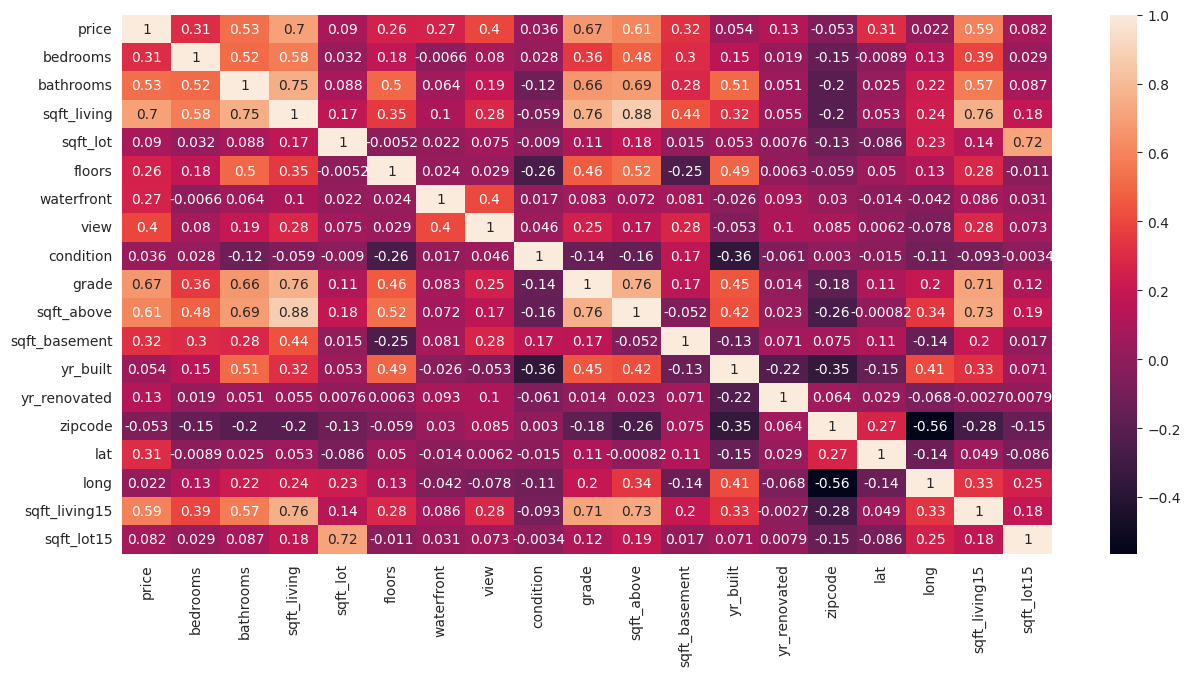

In [7]:
cormap = df.corr()
# mask = np.triu(np.ones_like(cormap))

plt.figure(figsize=(15,7))
sns.heatmap(cormap, annot=True) #, mask=mask)
plt.show()

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop("date",axis=1, inplace=True)


In [9]:
categorical = ['year', 'month', 'day', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'waterfront']

In [10]:
df.describe(percentiles=[])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


In [11]:
# n = df.shape[1]
# fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 20))
# axes = axes.flatten()
# for i in range(n):
#     col = df.columns[i]
#     sns.histplot(x=col, data=df,color="cornflowerblue", ax=axes[i], bins=100)
#     #axes[i].set_title(col)
# plt.tight_layout()
# plt.savefig('stats.pdf')
# plt.show()

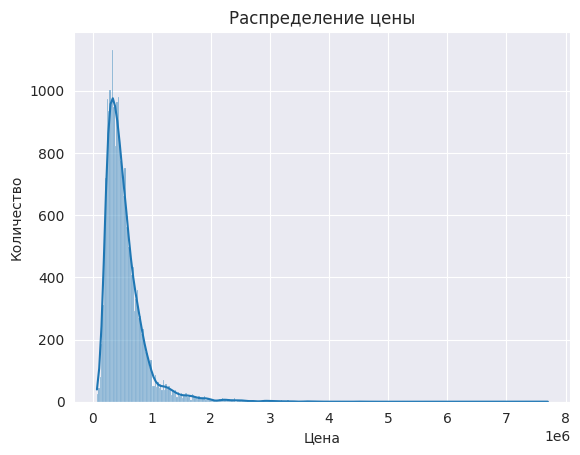

In [12]:
sns.histplot(df['price'], kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.ylabel
plt.savefig('figures/density_price_before.pdf')
plt.show()

In [13]:
porog = int(len(df)*0.01)

In [14]:
df = df.sort_values(['price'], ascending=False).iloc[porog:]

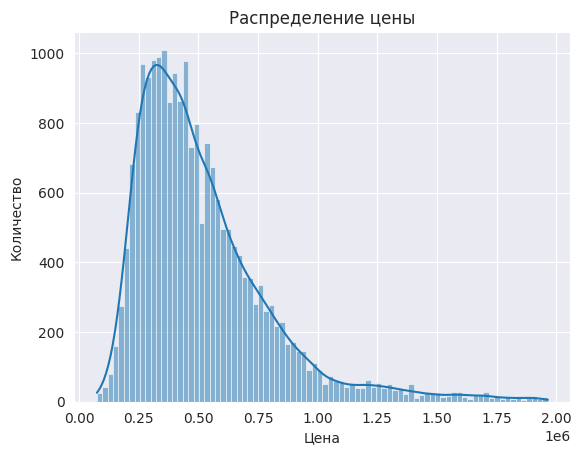

In [15]:
sns.histplot(df['price'], kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.savefig('figures/density_price_after.pdf')
plt.show()

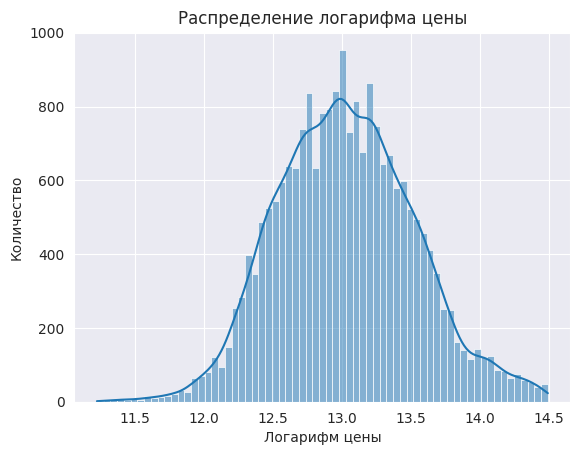

In [16]:
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество')
plt.savefig('figures/density_log_price.pdf')
plt.show()

In [17]:
y = np.log1p(df['price'].values)
X = df.drop(['price'], axis=1)

In [18]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [19]:
X.shape

(21397, 21)

In [20]:
numerical = np.setdiff1d(X.columns, categorical)

In [21]:
X_ohe = pd.get_dummies(X, columns=categorical)

In [22]:
X_ohe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_0,waterfront_1
3281,5,3.75,3940,13738,1.5,3940,0,47.6203,-122.212,2370,...,0,0,0,0,0,0,0,0,1,0
12577,4,4.00,4430,31353,2.0,4430,0,47.6422,-122.157,3900,...,0,0,0,0,0,0,0,0,1,0
12283,5,4.50,6200,23373,3.0,5050,1150,47.5632,-122.215,3700,...,0,0,0,0,0,0,0,0,1,0
1152,4,2.75,3120,7898,1.0,1560,1560,47.7165,-122.259,2630,...,0,0,0,0,0,0,0,0,0,1
9175,3,1.75,3330,12566,1.0,1940,1390,47.5287,-122.220,3730,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3,1.00,860,10426,1.0,860,0,47.4987,-122.341,1140,...,0,0,0,0,0,0,0,0,1,0
16198,2,1.00,730,9975,1.0,730,0,47.4808,-122.315,860,...,0,0,1,0,0,0,0,0,1,0
465,1,0.75,430,5050,1.0,430,0,47.6499,-121.909,1200,...,0,0,0,0,0,0,0,0,1,0
15293,2,1.00,780,16344,1.0,780,0,47.4739,-122.280,1700,...,0,0,1,0,0,0,0,0,1,0


In [23]:

scaler = MinMaxScaler()
X_ohe[numerical] = scaler.fit_transform(X_ohe[numerical]) 

In [24]:
X_ohe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_0,waterfront_1
3281,0.151515,0.500000,0.490591,0.008007,0.2,0.511921,0.000000,0.746984,0.254983,0.365609,...,0,0,0,0,0,0,0,0,1,0
12577,0.121212,0.533333,0.556452,0.018677,0.4,0.580645,0.000000,0.782210,0.300664,0.649416,...,0,0,0,0,0,0,0,0,1,0
12283,0.151515,0.600000,0.794355,0.013843,0.8,0.667602,0.352761,0.655139,0.252492,0.612317,...,0,0,0,0,0,0,0,0,1,0
1152,0.121212,0.366667,0.380376,0.004469,0.0,0.178121,0.478528,0.901721,0.215947,0.413838,...,0,0,0,0,0,0,0,0,0,1
9175,0.090909,0.233333,0.408602,0.007297,0.0,0.231417,0.426380,0.599646,0.248339,0.617882,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,0.090909,0.133333,0.076613,0.006001,0.0,0.079944,0.000000,0.551391,0.147841,0.137451,...,0,0,0,0,0,0,0,0,1,0
16198,0.060606,0.133333,0.059140,0.005727,0.0,0.061711,0.000000,0.522599,0.169435,0.085513,...,0,0,1,0,0,0,0,0,1,0
465,0.030303,0.100000,0.018817,0.002744,0.0,0.019635,0.000000,0.794595,0.506645,0.148581,...,0,0,0,0,0,0,0,0,1,0
15293,0.060606,0.133333,0.065860,0.009585,0.0,0.068724,0.000000,0.511501,0.198505,0.241328,...,0,0,1,0,0,0,0,0,1,0


In [29]:
X_ohe.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_0,waterfront_1
3281,0.151515,0.500000,0.490591,0.008007,0.2,0.511921,0.000000,0.746984,0.254983,0.365609,...,0,0,0,0,0,0,0,0,1,0
12577,0.121212,0.533333,0.556452,0.018677,0.4,0.580645,0.000000,0.782210,0.300664,0.649416,...,0,0,0,0,0,0,0,0,1,0
12283,0.151515,0.600000,0.794355,0.013843,0.8,0.667602,0.352761,0.655139,0.252492,0.612317,...,0,0,0,0,0,0,0,0,1,0
1152,0.121212,0.366667,0.380376,0.004469,0.0,0.178121,0.478528,0.901721,0.215947,0.413838,...,0,0,0,0,0,0,0,0,0,1
9175,0.090909,0.233333,0.408602,0.007297,0.0,0.231417,0.426380,0.599646,0.248339,0.617882,...,0,0,0,0,0,0,0,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe.values, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [26]:
y_train

array([13.08154347, 12.77987589, 12.75463038, ..., 12.56898162,
       12.34583894, 13.06473638])

## Экспы

In [27]:
dim = X_train.shape[1]
dim

336

In [28]:
# from sklearn.metrics import r2_score

# forest_my = RandomForestMSE(n_estimators=100)
# forest_sklearn = RandomForestRegressor(n_estimators=100, n_jobs=-1)

# forest_my.fit(X_train, y_train)
# y_pred_my = forest_my.predict(X_val)
# rmse_my = mean_squared_error(y_val, y_pred_my, squared=False)

# forest_sklearn.fit(X_train, y_train)
# y_pred_sklearn = forest_sklearn.predict(X_val)
# rmse_sklearn = mean_squared_error(y_val, y_pred_sklearn, squared=False)

# print('RMSE_MY =', rmse_my)
# print('RMSE_SKLEARN =', rmse_sklearn)

# print('R2_MY =', r2_score(y_val, y_pred_my))
# print('R2_SKLEARN =', r2_score(y_val, y_pred_sklearn))

In [29]:
# from sklearn.metrics import r2_score
# forest_my = GradientBoostingMSE(n_estimators=100, max_depth=5, learning_rate=0.5)
# forest_sklearn = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.5)

# forest_my.fit(X_train, y_train)
# y_pred_my = forest_my.predict(X_val)
# rmse_my = mean_squared_error(y_val, y_pred_my, squared=False)

# forest_sklearn.fit(X_train, y_train)
# y_pred_sklearn = forest_sklearn.predict(X_val)
# rmse_sklearn = mean_squared_error(y_val, y_pred_sklearn, squared=False)

# print('RMSE_MY =', rmse_my)
# print('RMSE_SKLEARN =', rmse_sklearn)

# print('RMSE_MY =', r2_score(y_val, y_pred_my))
# print('RMSE_SKLEARN =', r2_score(y_val, y_pred_sklearn))

In [30]:
# from sklearn.metrics import r2_score
# forest_my = GradientBoostingMSE(n_estimators=100, max_depth=5, learning_rate=0.5)
# forest_sklearn = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.5)

# forest_my.fit(X_train, y_train, X_val, y_val)
# #y_pred_my = forest_my.predict(X_val)
# #rmse_my = mean_squared_error(y_val, y_pred_my, squared=False)

# forest_sklearn.fit(X_train, y_train)
# y_pred_sklearn = forest_sklearn.predict(X_val)
# rmse_sklearn = mean_squared_error(y_val, y_pred_sklearn, squared=False)

# print('RMSE_MY =', forest_my.loss)
# print('RMSE_SKLEARN =', rmse_sklearn)

# # print('RMSE_MY =', r2_score(y_val, y_pred_my))
# # print('RMSE_SKLEARN =', r2_score(y_val, y_pred_sklearn))

In [ ]:
model_rf = RandomForestMSE()

## Случайный лес

In [103]:
max_n_trees = 500
model = RandomForestMSE(n_estimators=max_n_trees)
model.fit(X_train, y_train, X_val, y_val, is_loss_all=True)


In [104]:
loss_trees = model.loss
time_trees = np.cumsum(model.time)

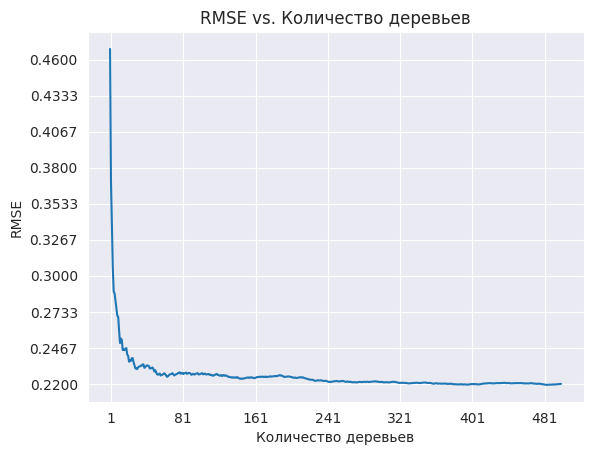

In [117]:
plt.plot(loss_trees)
plt.ylabel('RMSE')
plt.xlabel('Количество деревьев')
plt.title('RMSE vs. Количество деревьев')
plt.xticks(np.arange(1, 501, 80))
plt.yticks(np.linspace(0.22, 0.46, 10))
#plt.ylim([0.215, 0.47])
plt.savefig('figures/rf_n_trees.pdf')
plt.show()

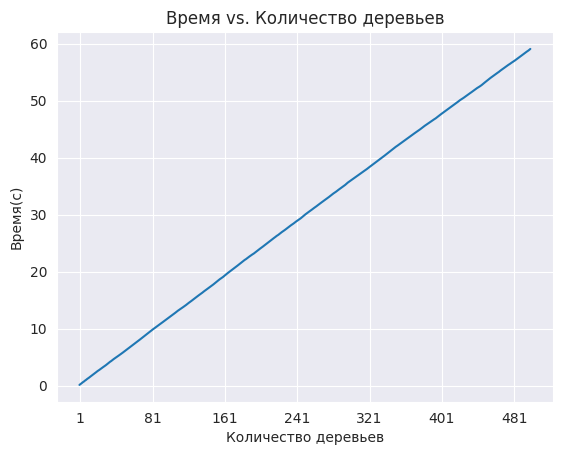

In [118]:
plt.plot(time_trees)
plt.ylabel('Время(с)')
plt.xlabel('Количество деревьев')
plt.title('Время vs. Количество деревьев')
plt.xticks(np.arange(1, 501, 80))
plt.savefig('figures/time_rf_n_trees.pdf')
plt.show()

In [108]:
best_tree = np.arange(max_n_trees)[np.argmin(model.loss)]
best_tree

483

In [79]:
dim_search = np.arange(1, dim+1, 35)
loss_dim = []
time_dim = []
for dimm in tqdm(dim_search):
    start = time.time()
    model = RandomForestMSE(n_estimators=100, feature_subsample_size=dimm)
    model.fit(X_train, y_train, X_val, y_val, is_loss_all=False)
    loss_dim.append(model.loss)
    time_dim.append(time.time() - start)

100%|██████████| 10/10 [02:25<00:00, 14.59s/it]


In [80]:
loss_dim

[0.49851029173967465,
 0.33803389538613815,
 0.25799655684586237,
 0.22024395309670702,
 0.20763798506993947,
 0.19521544517954342,
 0.1877776397052466,
 0.18606268774311893,
 0.18228095461039184,
 0.1839998476028887]

In [122]:
dim_search

array([  1,  36,  71, 106, 141, 176, 211, 246, 281, 316])

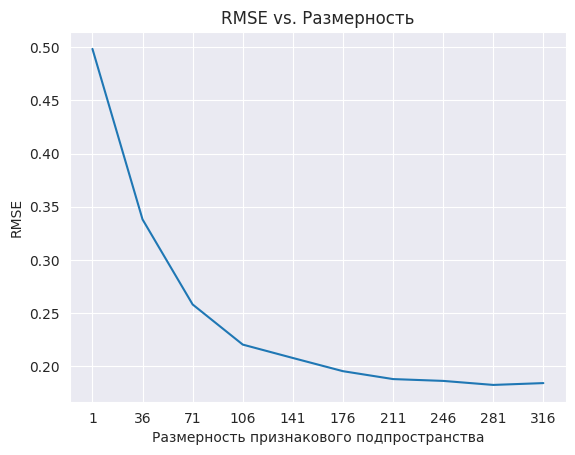

In [123]:
plt.plot(dim_search, loss_dim)
plt.ylabel('RMSE')
plt.xlabel('Размерность признакового подпространства')
plt.title('RMSE vs. Размерность')
plt.xticks(dim_search)
plt.savefig('figures/rf_dim.pdf')
plt.show()

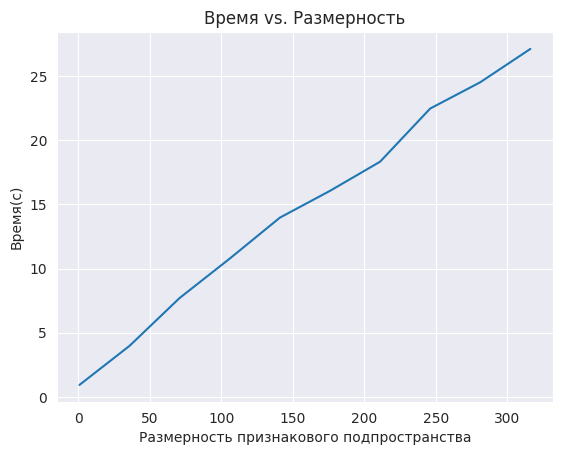

In [135]:
plt.plot(dim_search, time_dim)
plt.ylabel('Время(с)')
plt.xlabel('Размерность признакового подпространства')
plt.title('Время vs. Размерность')
#plt.xticks(dim_search)
plt.savefig('figures/time_rf_dim.pdf')
plt.show()

In [68]:
depth_search = np.arange(2, 50)
loss_depth = []
time_depth = []
for depth in tqdm(depth_search):
    start = time.time()
    model = RandomForestMSE(n_estimators=100, max_depth=depth)
    model.fit(X_train, y_train, X_val, y_val, is_loss_all=False)
    loss_depth.append(model.loss)
    time_depth.append(time.time() - start)

100%|██████████| 48/48 [07:08<00:00,  8.92s/it]


In [137]:
np.save()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

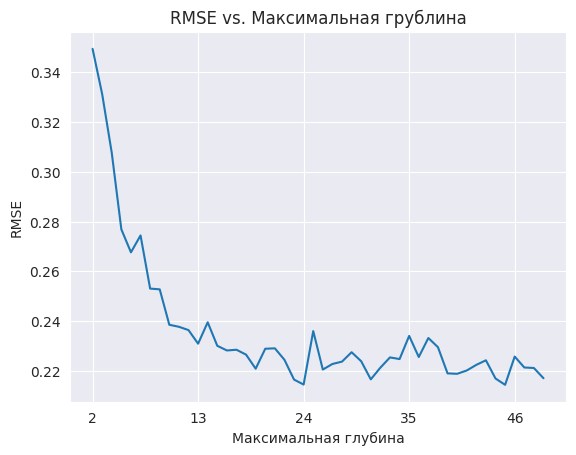

In [146]:
plt.plot(depth_search, loss_depth)
plt.ylabel('RMSE')
plt.xlabel('Максимальная глубина')
plt.title('RMSE vs. Максимальная грублина')
plt.xticks(np.arange(2, 50, 11))
plt.savefig('figures/rf_depth.pdf')
plt.show()

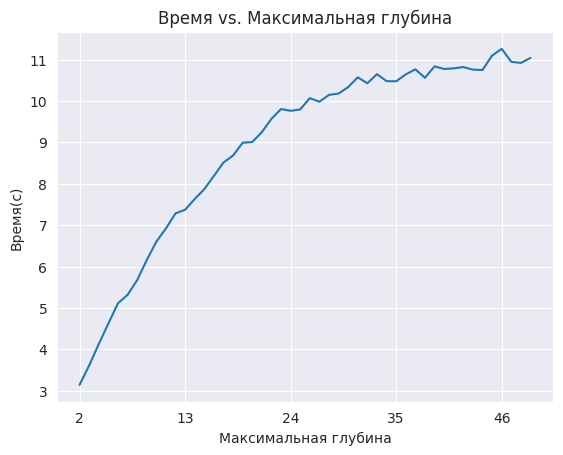

In [151]:
plt.plot(depth_search, time_depth)
plt.ylabel('Время(с)')
plt.xlabel('Максимальная глубина')
plt.title('Время vs. Максимальная глубина')
plt.xticks(np.arange(2, 50, 11))
plt.savefig('figures/time_rf_depth.pdf')
plt.show()

In [36]:
%%time
model = RandomForestMSE(n_estimators=100, max_depth=10, feature_subsample_size=50)
model.fit(X_train, y_train)
y_pred_my = model.predict(X_test)
rmse_my = mean_squared_error(y_test, y_pred_my, squared=False)
print(rmse_my)

0.31873726239317457
CPU times: user 2.91 s, sys: 426 ms, total: 3.34 s
Wall time: 3.34 s


## Градиентный бустинг

In [30]:

max_n_trees = 500
model = GradientBoostingMSE(n_estimators=max_n_trees)
model.fit(X_train, y_train, X_val, y_val, is_loss_all=True)

In [31]:
loss_trees = model.loss
time_trees = np.cumsum(model.time)

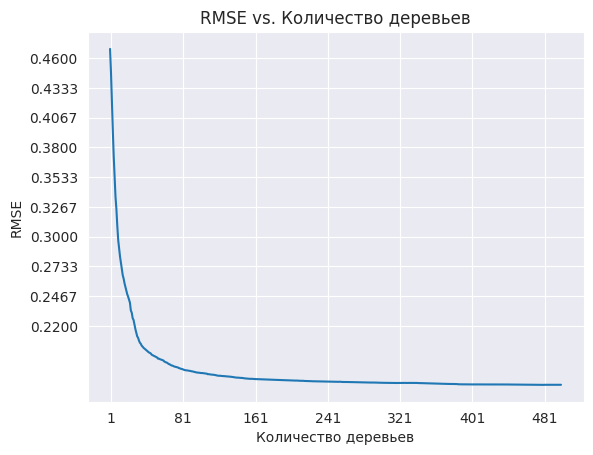

In [32]:
plt.plot(loss_trees)
plt.ylabel('RMSE')
plt.xlabel('Количество деревьев')
plt.title('RMSE vs. Количество деревьев')
plt.xticks(np.arange(1, 501, 80))
plt.yticks(np.linspace(0.22, 0.46, 10))
#plt.ylim([0.215, 0.47])
plt.savefig('figures/gb_n_trees.pdf')
plt.show()

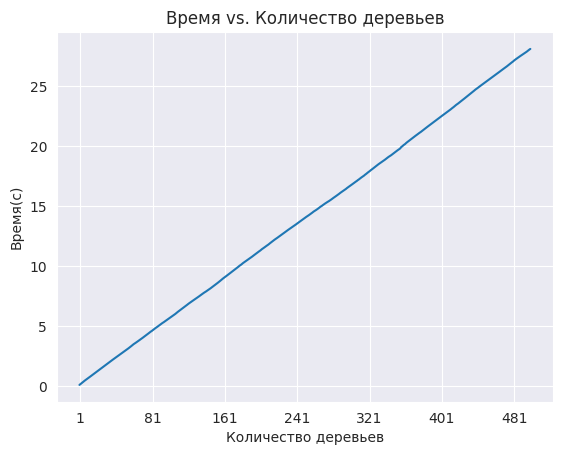

In [33]:
plt.plot(time_trees)
plt.ylabel('Время(с)')
plt.xlabel('Количество деревьев')
plt.title('Время vs. Количество деревьев')
plt.xticks(np.arange(1, 501, 80))
plt.savefig('figures/time_gb_n_trees.pdf')
plt.show()

In [34]:
best_tree = np.arange(max_n_trees)[np.argmin(model.loss)]
best_tree

477

In [36]:
dim_search = np.arange(1, dim+1, 35)
loss_dim = []
time_dim = []
for dimm in tqdm(dim_search):
    start = time.time()
    model = GradientBoostingMSE(n_estimators=100, feature_subsample_size=dimm)
    model.fit(X_train, y_train, X_val, y_val, is_loss_all=False)
    loss_dim.append(model.loss)
    time_dim.append(time.time() - start)

100%|██████████| 10/10 [01:21<00:00,  8.20s/it]


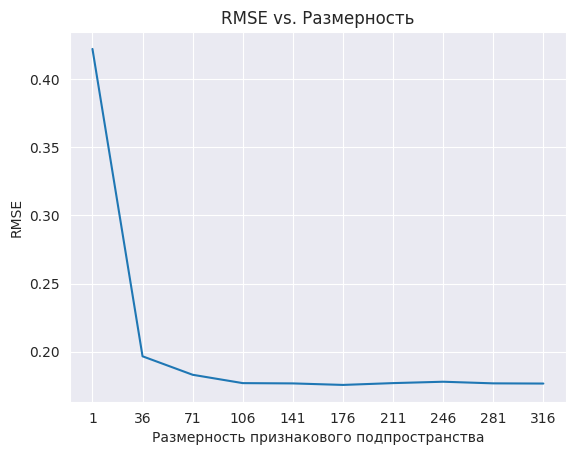

In [37]:
plt.plot(dim_search, loss_dim)
plt.ylabel('RMSE')
plt.xlabel('Размерность признакового подпространства')
plt.title('RMSE vs. Размерность')
plt.xticks(dim_search)
plt.savefig('figures/gb_dim.pdf')
plt.show()

In [53]:
best_dim = dim_search[np.argmin(loss_dim)]
best_dim

176

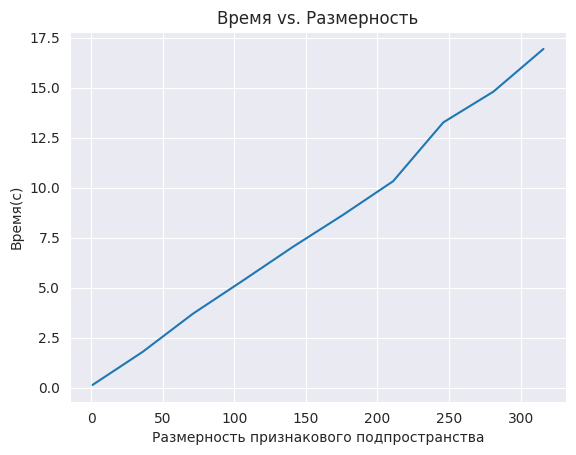

In [38]:
plt.plot(dim_search, time_dim)
plt.ylabel('Время(с)')
plt.xlabel('Размерность признакового подпространства')
plt.title('Время vs. Размерность')
#plt.xticks(dim_search)
plt.savefig('figures/time_gb_dim.pdf')
plt.show()

In [39]:
depth_search = np.arange(2, 50)
loss_depth = []
time_depth = []
for depth in tqdm(depth_search):
    start = time.time()
    model = GradientBoostingMSE(n_estimators=100, max_depth=depth)
    model.fit(X_train, y_train, X_val, y_val, is_loss_all=False)
    loss_depth.append(model.loss)
    time_depth.append(time.time() - start)

100%|██████████| 48/48 [08:47<00:00, 10.99s/it]


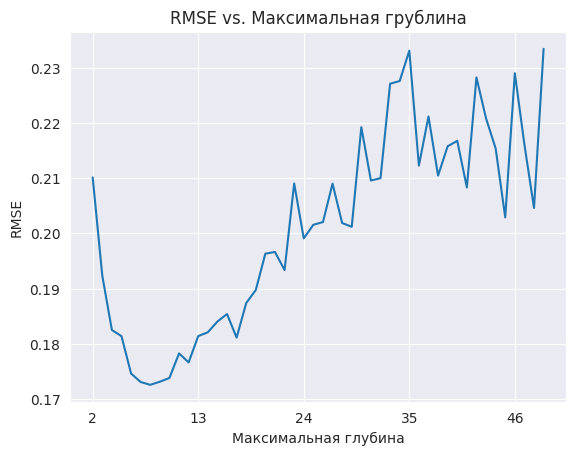

In [40]:
plt.plot(depth_search, loss_depth)
plt.ylabel('RMSE')
plt.xlabel('Максимальная глубина')
plt.title('RMSE vs. Максимальная грублина')
plt.xticks(np.arange(2, 50, 11))
plt.savefig('figures/gb_depth.pdf')
plt.show()

In [54]:
best_depth = depth_search[np.argmin(loss_depth)]
best_depth

8

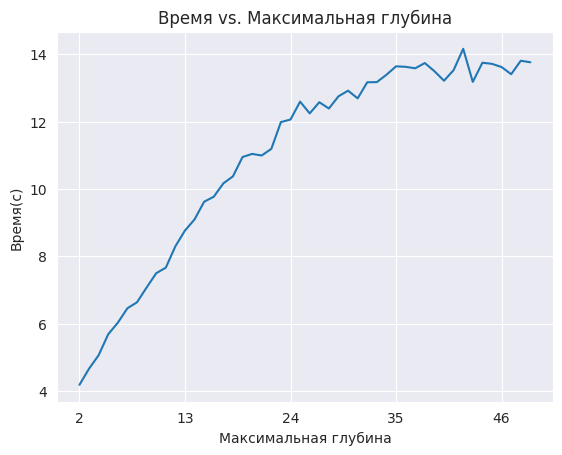

In [41]:
plt.plot(depth_search, time_depth)
plt.ylabel('Время(с)')
plt.xlabel('Максимальная глубина')
plt.title('Время vs. Максимальная глубина')
plt.xticks(np.arange(2, 50, 11))
plt.savefig('figures/time_gb_depth.pdf')
plt.show()

In [44]:
lr_search = np.logspace(-6, 0, 7)
lr_search

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [39]:
lr_search = np.logspace(-4, 0, 20)
loss_lr = []
time_lr = []
for lr in tqdm(lr_search):
    start = time.time()
    model = GradientBoostingMSE(n_estimators=100, learning_rate=lr)
    model.fit(X_train, y_train, X_val, y_val, is_loss_all=False)
    loss_lr.append(model.loss)
    time_lr.append(time.time() - start)

100%|██████████| 20/20 [01:52<00:00,  5.65s/it]


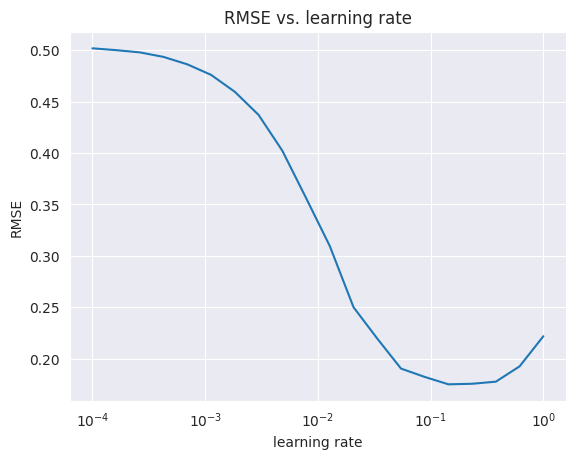

In [40]:
plt.plot(lr_search, loss_lr)
plt.ylabel('RMSE')
plt.xlabel('learning rate')
plt.title('RMSE vs. learning rate')
#plt.xticks(np.arange(2, 50, 11))
plt.xscale('log')

plt.savefig('figures/gb_lr.pdf')
plt.show()

In [42]:
best_lr = lr_search[np.argmin(loss_lr)]
best_lr

0.14384498882876628

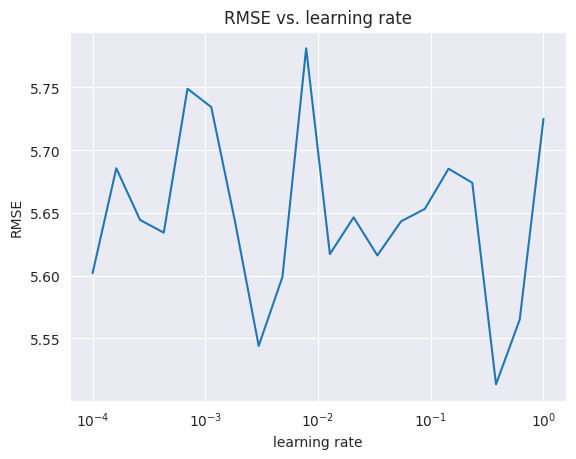

In [41]:
plt.plot(lr_search, time_lr)
plt.ylabel('RMSE')
plt.xlabel('learning rate')
plt.title('RMSE vs. learning rate')
#plt.xticks(np.arange(2, 50, 11))
plt.xscale('log')

plt.savefig('figures/time_gb_lr.pdf')
plt.show()

In [30]:
model = GradientBoostingMSE(n_estimators=477, max_depth=8, feature_subsample_size=176, learning_rate=0.14)
model.fit(X_train, y_train)
y_pred_my = model.predict(X_test)
rmse_my = mean_squared_error(y_test, y_pred_my, squared=False)
print(rmse_my)

0.16677945383977846
